In [27]:
import jax
import jax.numpy as jnp
from jax import random
import abtem
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

In [17]:
wave = abtem.PlaneWave(energy=80e3)
Cs = -8e-6 * 1e10  # spherical aberration (-8 um)
ctf = abtem.CTF(Cs=Cs, energy=wave.energy, defocus="scherzer", semiangle_cutoff=45)

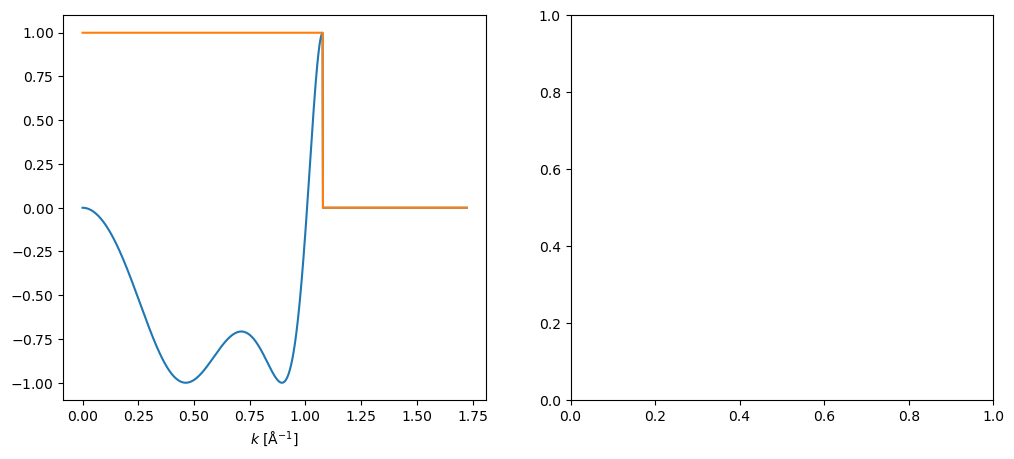

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ctf.profiles().show(ax=ax1)

In [5]:
?abtem.CTF

Init signature:
abtem.CTF(
    semiangle_cutoff: 'float | BaseDistribution' = inf,
    soft: 'bool' = True,
    focal_spread: 'float | BaseDistribution' = 0.0,
    angular_spread: 'float | BaseDistribution' = 0.0,
    aberration_coefficients: 'dict[str, float | BaseDistribution]' = None,
    energy: 'float' = None,
    extent: 'float | tuple[float, float]' = None,
    gpts: 'int | tuple[int, int]' = None,
    sampling: 'float | tuple[float, float]' = None,
    flip_phase: 'bool' = False,
    wiener_snr: 'float' = 0.0,
    **kwargs,
)
Docstring:     
The contrast transfer function (CTF) describes the aberrations of the objective lens in HRTEM and specifies how
the condenser system shapes the probe in STEM.

abTEM implements phase aberrations up to 5th order using polar coefficients.
See Eq. 2.22 in the reference [1]_.

Cartesian coefficients can be converted to polar using the utility function `abtem.transfer.cartesian2polar`.

Partial coherence is included as envelopes in the quasi-coh

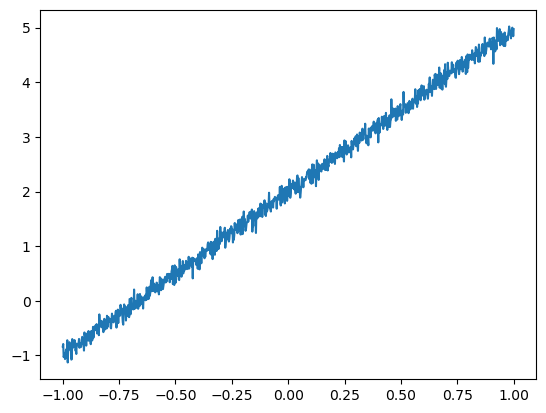

In [29]:
x = jnp.linspace(-1, 1, 1000)
y = 3.0 * x + 2.0 + 0.1 * random.normal(random.PRNGKey(0), (1000,))
plt.plot(x, y, label="Data")

In [ ]:
def numpyro_ctf(Cs, defocus, semiangle_cutoff):
    """CTF model for numpyro."""
    sigma = numpyro.sample("sigma", dist.Exponential(1))
    Cs = numpyro.sample("Cs", dist.Normal(loc=1e7, scale=1e6))
    wave = abtem.PlaneWave(energy=80e3)
    ctf = abtem.CTF(Cs=Cs, energy=wave.energy, defocus=defocus, semiangle_cutoff=semiangle_cutoff)
    # define likelihood
    numpyro.sample("obs", dist.Normal(mean, scale), obs=data)

In [30]:
def linear_model(x, y):
    """Linear regression model."""
    slope = numpyro.sample("slope", dist.Normal(0, 1))
    intercept = numpyro.sample("intercept", dist.Normal(0, 1))
    sigma = numpyro.sample("sigma", dist.Exponential(1))
    
    mean = slope * x + intercept
    numpyro.sample("obs", dist.Normal(mean, sigma), obs=y)

In [31]:
mcmc_key = random.PRNGKey(0)
kernel = NUTS(linear_model, target_accept_prob=0.65)
mcmc = MCMC(kernel, num_warmup=250, num_samples=500, num_chains=1)